# MEDICAL INSURANCE COSTS

In this project, we will analyze a health insurance dataset to extract valuable insights, and relationships among various variables and insurance costs. We will focus on each variable separately and attempt to determine if there are any correlations between them and the charges.

#### IMPORT LIBRARIES

In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

#### DATA EXTRACTION - from .csv to DataFrame

In [2]:
insurance_data_df = pd.read_csv('insurance.csv')
insurance_data_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


-------------------------------------------------------------------------------------------------------------

## AGE FACTOR

In [3]:
ages = [i for i in insurance_data_df['age']]

First, we'll determine the average age within our dataset.

In [4]:
total = 0
for age in insurance_data_df['age']: total += age
average_age = round(total / len(insurance_data_df),2)
print(f"The average age in our datset is of {average_age} years")

The average age in our datset is of 39.21 years


#### DISTRIBUTION

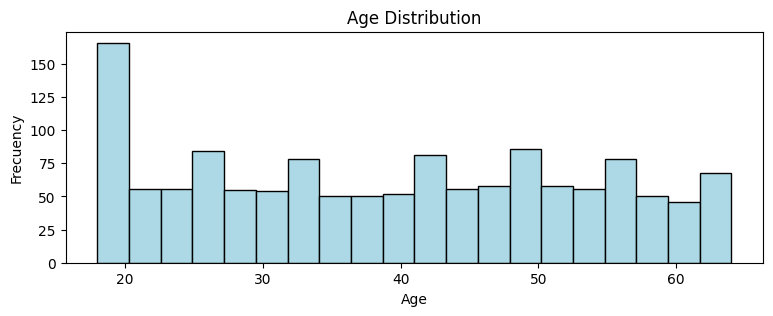

In [5]:
# Modify chart size.
plt.figure(figsize=(9, 3)) 
# Creating histogram.
plt.hist(insurance_data_df['age'], bins=20, color='lightblue', edgecolor='black')

# Adding Labels and Tittle.
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frecuency')

# Show chart
plt.show()

As can be seen, we observe a left-skewed distribution, with ages 18 and 19 standing out significantly from the rest, enough to consider them outliers. Therefore, I will calculate the median to mitigate the impact of these outliers on our analysis. In my opinion, this deviation is noteworthy, as young people typically do not prioritize such services as much.

· MEDIAN
- Although I know I could use the sorted() Python function, to put my knowledge to the test, I prefer to implement a bubble sorting algorithm from scratch.

In [6]:
# I prefer to make a copy in order to not modify the original one.
ages_copy = ages
def bubble_sort(arr):
    n = len(ages)
    for i in range(n):
        for k in range(0,n-i-1):
            if arr[k] > arr[k+1]:
                arr[k], arr[k+1] = arr[k+1], arr[k]
bubble_sort(ages_copy)
median = ages_copy[round(len(ages_copy)/2)]
print(f"The mean age in our dataset is {median}")

The mean age in our dataset is 39


We got the same value for the mean and the median, so we can conclude that those ourliers doesn't affect our analysis

Now, we'll attempt to determine if there's any correlation between age and insurance costs. As seen later in this document, smoking is a significant factor when calculating insurance costs, so to mitigate its effect on our analysis in this next test, we'll work without taking smokers into consideration.

I'd like to mention that this time, I'll be employing a quick sort recursive algorithm. This choice aims to reduce execution time while also allowing me to further apply and enhance my knowledge in the process.

In [7]:
# Creating a new df without smokers
non_smoker_df = insurance_data_df.loc[insurance_data_df['smoker'] == 'no']

# Recursive sorting algorithm to reduce the execution time,
# I tried using bubble sort like before, but it was taking too long.
def quick_sort(df, columna):
    def quicksort_aux(df):
        n = len(df)
        if n <= 1:
            return df
        else:
            pivot = df[columna].iloc[0]  # Pivot element
            smaller = df[df[columna] < pivot]  # Smaller elements
            equal = df[df[columna] == pivot]  # Equals to the pivot element
            bigger = df[df[columna] > pivot]  # Bigger elements
            
            return pd.concat([quicksort_aux(smaller), equal, quicksort_aux(bigger)]) 
    sorted_df = quicksort_aux(df)

    return sorted_df

sorted_data_for_age_correlation = quick_sort(non_smoker_df,'age')

Now that our dataset is sorted, we'll create a scatter plot to visually represent these two variables. This will allow us to take an initial look and attempt to extract any insights.

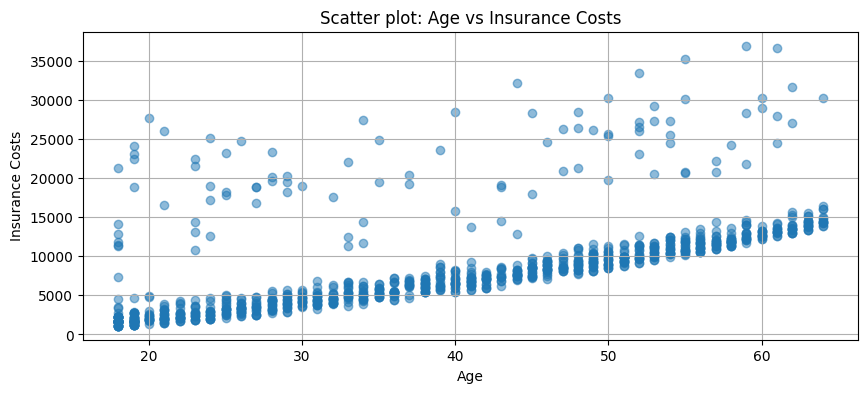

In [8]:
x = sorted_data_for_age_correlation['age']
y = sorted_data_for_age_correlation['charges']

plt.figure(figsize=(10, 4))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot: Age vs Insurance Costs')
plt.xlabel('Age')
plt.ylabel('Insurance Costs')
plt.grid(True)
plt.show()

At first glance, we can see that there might be some correlation between age and charges, even though there are some outstanding points. These outliers could be due to other factors.

Now we'll calculate the correlation coefficient using a predefined Python function.

In [9]:
correlation = round(non_smoker_df['age'].corr(non_smoker_df['charges']),2)

print("Correlation coefficent:", correlation)

Correlation coefficent: 0.63


A correlation coefficient of 0.63 indicates a moderate to strong level of correlation between the variables.

-------------------------------------------------------------------------------------------------------------

## SEX

Let's find out the percentage of males and females in our dataset.

In [10]:
# Genre accounting
males = sum(1 for i in insurance_data_df['sex'] if i == 'male')
females = sum(1 for i in insurance_data_df['sex'] if i == 'female')
# Finding percentages
male_percentage = round((males/len(insurance_data_df)),2)*100
female_percentage = round((females/len(insurance_data_df)),2)*100
# Results
print(f"There are {males} males and {females} females in our dataset, which constitute {male_percentage}% and {female_percentage}% respectively.")

There are 676 males and 662 females in our dataset, which constitute 51.0% and 49.0% respectively.


Now we'll know the average insurance costs for males and females

In [11]:
total_male_costs = sum(insurance_data_df.loc[insurance_data_df['sex'] == 'male', 'charges'])
total_female_costs = sum(insurance_data_df.loc[insurance_data_df['sex'] == 'female', 'charges'])

male_avg_cost = round(total_male_costs/males, 2)
female_avg_cost = round(total_female_costs/males, 2)
print(f'The average insurance costs for males and females in our dataset is {male_avg_cost}$ and {female_avg_cost}$ respectively.')

The average insurance costs for males and females in our dataset is 13956.75$ and 12309.26$ respectively.


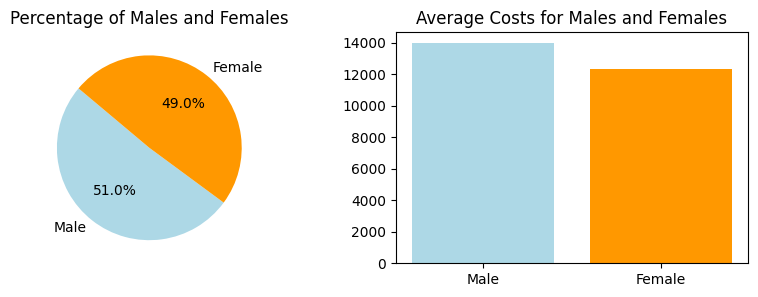

In [12]:
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]

# Colors for the charts
colors = ['lightblue', '#FF9800']

# Creating 2 plots
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Pie chart on left
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Percentage of Males and Females')

# Bar chart on right
gender = ['Male', 'Female']
average_costs = [male_avg_cost, female_avg_cost]
axs[1].bar(gender, average_costs, color=colors)
axs[1].set_title('Average Costs for Males and Females')

plt.show()

We observe that the number of males and females in our dataset is almost the same. Additionally, it appears that males' insurance costs are slightly higher than those of females. Later, we'll explore whether this difference is related to other factors.

------------------------------------------------------------------------------------------------------

## BMI

First we'll determine the average bmi in our dataset

In [13]:
bmis = [i for i in insurance_data_df['bmi']]
average_bmi = round(sum(bmis)/len(insurance_data_df),2)
print(f'The average bmi in our dataset is of {average_bmi}')

The average bmi in our dataset is of 30.66


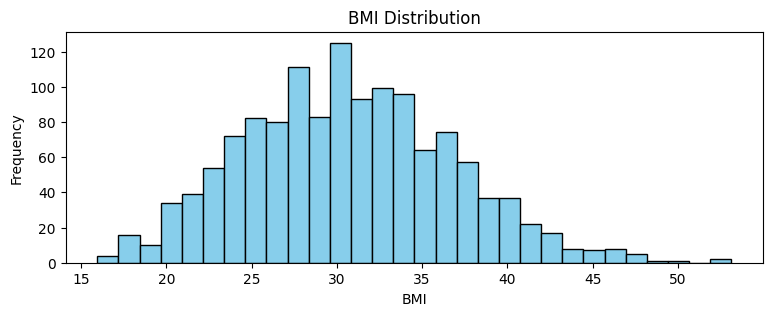

In [14]:
plt.figure(figsize=(9, 3)) 

plt.hist(bmis, bins=30, color='skyblue', edgecolor='black')

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

We observe a normal distribution in the BMI data.

Now we'll determine if is there any correlation between bmi and insurance cost:

In [15]:
sorted_data_for_bmi_correlation = quick_sort(non_smoker_df,'bmi')

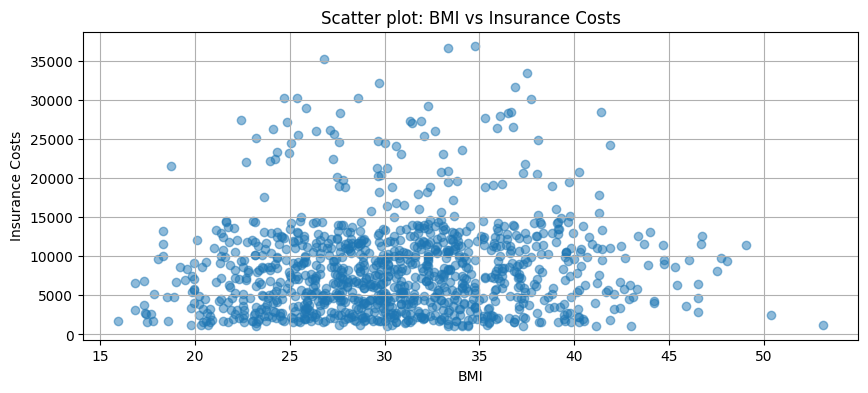

In [16]:
x = sorted_data_for_bmi_correlation['bmi']
y = sorted_data_for_bmi_correlation['charges']

plt.figure(figsize=(10, 4))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot: BMI vs Insurance Costs')
plt.xlabel('BMI')
plt.ylabel('Insurance Costs')
plt.grid(True)
plt.show()

In [17]:
correlation = round(non_smoker_df['bmi'].corr(non_smoker_df['charges']),2)

print("Correlation coefficent:", correlation)

Correlation coefficent: 0.08


It appears to be no correlation between these two variables.

-------------------------------------------------------------------------------------------------------------

## SMOKING FACTOR

First, we'll determine the number of smokers and non-smokers in this dataset, as well as the percentage each group represents.

In [18]:
smokers = sum(1 for i in insurance_data_df['smoker'] if i == 'yes')
non_smokers = sum(1 for i in insurance_data_df['smoker'] if i == 'no')

smoker_percentage = round((smokers / len(insurance_data_df)) * 100, 3)
non_smoker_percentage = round((non_smokers / len(insurance_data_df)) * 100, 3)

print(f'The amount of smokers in our dataset is {smokers}, which constitute a {smoker_percentage}% of the sample')

The amount of smokers in our dataset is 274, which constitute a 20.478% of the sample


Average cost for smokers and non smokers:

In [19]:
total_smokers_insurance_cost = sum(insurance_data_df.loc[insurance_data_df['smoker'] == 'yes', 'charges'])
total_non_smokers_insurance_cost = sum(insurance_data_df.loc[insurance_data_df['smoker'] == 'no', 'charges'])

avg_smoker_cost = round(total_smokers_insurance_cost/smokers, 2)
avg_non_smoker_cost = round(total_non_smokers_insurance_cost/non_smokers, 2)

print(f'The average costs for smokers and non-smokers are {avg_smoker_cost}$ and {avg_non_smoker_cost}$ respectively')

The average costs for smokers and non-smokers are 32050.23$ and 8434.27$ respectively


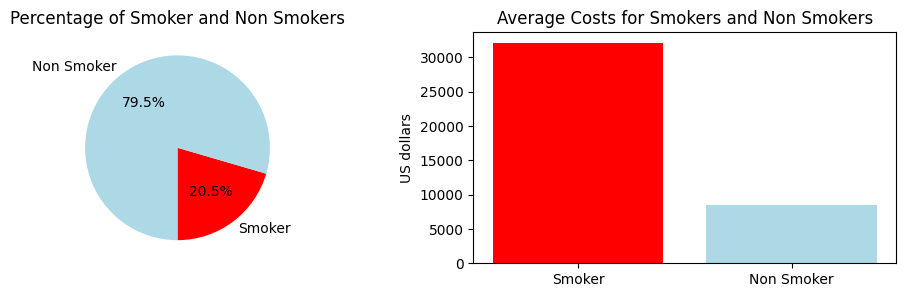

In [20]:
labels = ['Smoker', 'Non Smoker']
sizes = [smoker_percentage, non_smoker_percentage]

# Colors for the charts
colors = ['red', 'lightblue']

# Creating 2 plots
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Pie chart on left
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=-90)
axs[0].set_title('Percentage of Smoker and Non Smokers')

# Bar chart on right
average_costs = [avg_smoker_cost, avg_non_smoker_cost]
axs[1].bar(labels, average_costs, color=colors)
axs[1].set_title('Average Costs for Smokers and Non Smokers')
plt.ylabel('US dollars')

plt.show()

We can observe that smokers constitute 20.5% of our sample and that their average insurance cost is much higher than for non-smokers. With that being said, we can conclude that smoking is not only bad for your health but also for your wallet, as smoking is a significant factor in calculating medical insurance prices. 

-------------------------------------------------------------------------------------------------------------

## CHILDREN FACTOR

First, we'll determine the frequency of number of children per patient in this dataset, then, we'll be looking for the average cost per patient based on the number of children.

In [21]:
num_child_freq = []
avg_cost_per_children = []
num_child_percentage = []

for i in range(6):
    avg_cost = sum(insurance_data_df.loc[insurance_data_df['children'] == i, 'charges']) / sum(1 for k in insurance_data_df['children'] if k == i)
    child_freq = sum(1 for k in insurance_data_df['children'] if k == i)
    child_percentage = round((child_freq/len(insurance_data_df))*100, 2)
    
    avg_cost_per_children.append(round(avg_cost,2))
    num_child_freq.append(child_freq)
    num_child_percentage.append(child_percentage)

Now we can visually represent the distribution of the number of children per patient throughout our dataset.

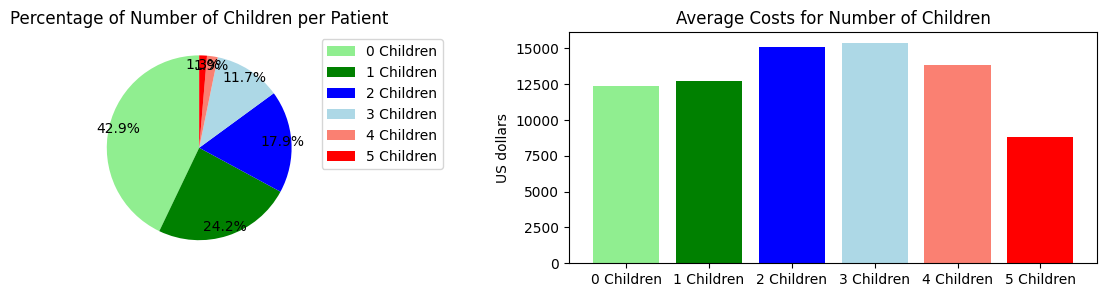

In [22]:
# Labels 
labels = ['0 Children', '1 Children', '2 Children', '3 Children', '4 Children', '5 Children']

# Colors for both charts
colors = ['lightgreen', 'green', 'blue', 'lightblue', 'salmon', 'red']

# Creating 2 plots
fig, axs = plt.subplots(1, 2, figsize=(15, 3))

# Pie chart on left
pie = axs[0].pie(num_child_percentage, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.9)
axs[0].set_title('Percentage of Number of Children per Patient')
axs[0].legend(pie[0], labels, loc="upper left", bbox_to_anchor=(1, 1))  # Move legend to the right

# Bar chart on right
bars = axs[1].bar(labels, avg_cost_per_children, color=colors)
axs[1].set_title('Average Costs for Number of Children')
plt.ylabel('US dollars')

plt.show()

Here, we try to determine if is there any correlation between number of children and insurance cost.

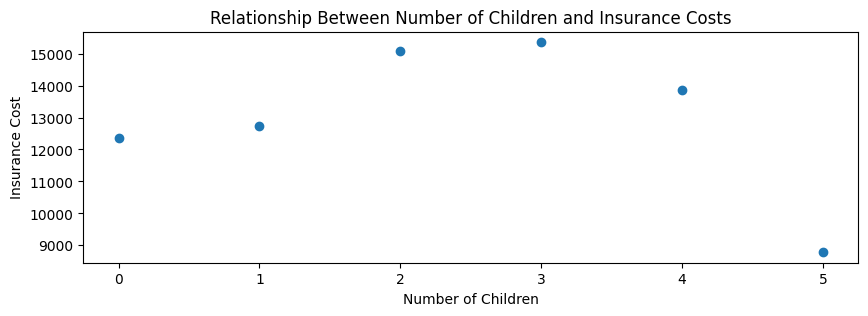

In [23]:
num_children= list(set(insurance_data_df['children']))


plt.figure(figsize=(10,3))
# Create scatter plot
plt.scatter(num_children, avg_cost_per_children, linestyle='-')

# Add labels and title
plt.xlabel('Number of Children')
plt.ylabel('Insurance Cost')
plt.title('Relationship Between Number of Children and Insurance Costs')

# Show plot
plt.show()

In my opinion, there does not appear to be a significant correlation between the number of children and insurance costs based on our analysis. As we can see, there is not a proportional increase in the price with the number of children. Anyways we can confirm this observation like before with .corr() function.

In [24]:
correlation = round(non_smoker_df['children'].corr(non_smoker_df['charges']),2)

print("Correlation coefficent:", correlation)

Correlation coefficent: 0.14


Here we also determine that number of children has no correlation with insurance cost.

-------------------------------------------------------------------------------------------------------------

## REGION FACTOR

First, we'll identify the different regions included in this dataset.

In [25]:
regions = list(set(insurance_data_df['region']))
regions

['northeast', 'southeast', 'northwest', 'southwest']

From this, we can now pose two questions:
- How many people are in our dataset from each region?
- What is the average insurance cost in each region?

In [26]:
num_patients = []

for i in regions:
    patients = sum(1 for k in insurance_data_df['region'] if k == i)
    num_patients.append(patients)

patients_per_region = dict(zip(regions, num_patients))
for i,k in patients_per_region.items():
    print(f"{i}: {k} patients")

northeast: 324 patients
southeast: 364 patients
northwest: 325 patients
southwest: 325 patients


Average cost per region

In [27]:
for i in regions:
    avg_cost = round((sum(insurance_data_df.loc[insurance_data_df['region'] == i, 'charges']))/patients_per_region[i],2)
    patients_per_region[i] = (patients_per_region[i], avg_cost)

In [28]:
print('AVERAGE COST PER REGION')
for i,k in patients_per_region.items():
    print(f"{i}: {k[1]}$")

AVERAGE COST PER REGION
northeast: 13406.38$
southeast: 14735.41$
northwest: 12417.58$
southwest: 12346.94$


At this point, I conclude that region isn't a significant factor in insurance cost, as the average insurance cost per region is very similar across all four regions.

-------------------------------------------------------------------------------------------------------------

## CONCLUSION

In conclusion, acknowledging the boundaries of my current expertise, it's evident that the most significant factors impacting medical insurance prices (based on this dataset) are smoking and age. Smoking represents a significant jump in price for smokers, while age corresponds to a gradual increase as one gets older. Furthermore, it's worth noting that while my analysis provides some valuable insights, a more in-depth examination would likely reveal additional important information.